 # ASSOCIATIONS: TWO CATEGORICAL VARIABLES

## Introduction

In this lesson, we will cover ways of examining an association between two categorical variables.

As an example, we’ll explore a sample of data from the Narcissistic Personality Inventory (NPI-40), a personality test with 40 questions about personal preferences and self-view. There are two possible responses to each question. The sample we’ll be working with contains responses to the following:

- influence: yes = I have a natural talent for influencing people; no = I am not good at influencing people.
- blend_in: yes = I prefer to blend in with the crowd; no = I like to be the center of attention.
- special: yes = I think I am a special person; no = I am no better or worse than most people.
- leader: yes = I see myself as a good leader; no = I am not sure if I would make a good leader.
- authority: yes = I like to have authority over other people; no = I don’t mind following orders.

As you might guess, responses to some of these questions are associated. For example, if we know whether someone views themself as a good leader, we may also find that they’re more likely to like having authority. In this lesson we’ll learn how to assess whether an association exists between any two of these variables.


In [15]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
npi = pd.read_csv("npi_sample.csv")

npi.head()

,influence,blend_in,special,leader,authority
0,no,yes,yes,yes,yes
1,no,yes,no,no,no
2,yes,no,yes,yes,yes
3,yes,no,no,yes,yes
4,yes,yes,no,yes,no


## Contingency Tables: Frequencies

Contingency tables, also known as two-way tables or cross-tabulations, are useful for summarizing two variables at the same time. For example, suppose we are interested in understanding whether there is an association between influence (whether a person thinks they have a talent for influencing people) and leader (whether they see themself as a leader).

In [3]:
influence_leader_freq = pd.crosstab(npi.influence, npi.leader)
print(influence_leader_freq)

leader       no   yes
influence            
no         3015  1293
yes        2360  4429


This table tells us the number of people who gave each possible combination of responses to these two questions. For example, 2360 people said that they do not see themselves as a leader but have a talent for influencing people.

To assess whether there is an association between these two variables, we need to ask whether information about one variable gives us information about the other. In this example, we see that among people who don’t see themselves as a leader (the first column), a larger number (3015) don’t think they have a talent for influencing people. Meanwhile, among people who do see themselves as a leader (the second column), a larger number (4429) do think they have a talent for influencing people.

So, if we know how someone responded to the leadership question, we have some information about how they are likely to respond to the influence question. This suggests that the variables are associated.

In [4]:
special_authority_freq = pd.crosstab(npi.special, npi.authority)
print(special_authority_freq)

authority    no   yes
special              
no         4069  1905
yes        2229  2894


***

## Contingency Tables: Proportions

In the previous exercise, we looked at an association between the influence and leader questions using a contingency table of frequencies. However, sometimes it’s helpful to convert those frequencies to proportions. We can accomplish this simply by dividing the all the frequencies in a contingency table by the total number of observations (the sum of the frequencies):



In [7]:
influence_leader_prop = influence_leader_freq/len(npi)
print(influence_leader_prop)

leader           no       yes
influence                    
no         0.271695  0.116518
yes        0.212670  0.399117


The resulting contingency table makes it slightly easier to compare the proportion of people in each category. For example, we see that the two largest proportions in the table (.399 and .271) are in the yes/yes and no/no cells of the table. We can also see that almost 40% of the surveyed population (by far the largest proportion) both see themselves as leaders and think they have a talent for influencing people.

In [9]:
# save the table of proportions as special_authority_prop:
special_authority_prop = special_authority_freq/len(npi)

# print out special_authority_prop
print(special_authority_prop)

authority        no       yes
special                      
no         0.366676  0.171668
yes        0.200865  0.260791


***

## Marginal Proportions

Now, let’s take a moment to think about what the tables would look like if there were no association between the variables. Our first instinct may be that there would be .25 (25%) of the data in each of the four cells of the table, but that is not the case. Let’s take another look at our contingency table.

In [10]:
influence_leader_prop = influence_leader_freq/len(npi)
print(influence_leader_prop)

leader           no       yes
influence                    
no         0.271695  0.116518
yes        0.212670  0.399117


We might notice that the bottom row, which corresponds to people who think they have a talent for influencing people, accounts for 0.213 + 0.399 = 0.612 (or 61.2%) of surveyed people — more than half! This means that we can expect higher proportions in the bottom row, regardless of whether the questions are associated.

The proportion of respondents in each category of a single question is called a marginal proportion. For example, the marginal proportion of the population that has a talent for influencing people is 0.612. We can calculate all the marginal proportions from the contingency table of proportions (saved as __influence_leader_prop__) using row and column sums as follows:

In [11]:
leader_marginals = influence_leader_prop.sum(axis=0)
print(leader_marginals)
influence_marginals =  influence_leader_prop.sum(axis=1)
print(influence_marginals)

leader
no     0.484365
yes    0.515635
dtype: float64
influence
no     0.388213
yes    0.611787
dtype: float64


While respondents are approximately split on whether they see themselves as a leader, more people think they have a talent for influencing people than not.

In [12]:
# calculate and print authority_marginals
authority_marginals = special_authority_prop.sum(axis=0)
print(authority_marginals)

authority
no     0.567541
yes    0.432459
dtype: float64


In [13]:
# calculate and print special_marginals
special_marginals = special_authority_prop.sum(axis=1)
print(special_marginals)

special
no     0.538344
yes    0.461656
dtype: float64


***

## Expected Contingency Tables

In order to understand whether these questions are associated, we can use the marginal proportions to create a contingency table of expected proportions if there were no association between these variables. To calculate these expected proportions, we need to multiply the marginal proportions for each combination of categories:

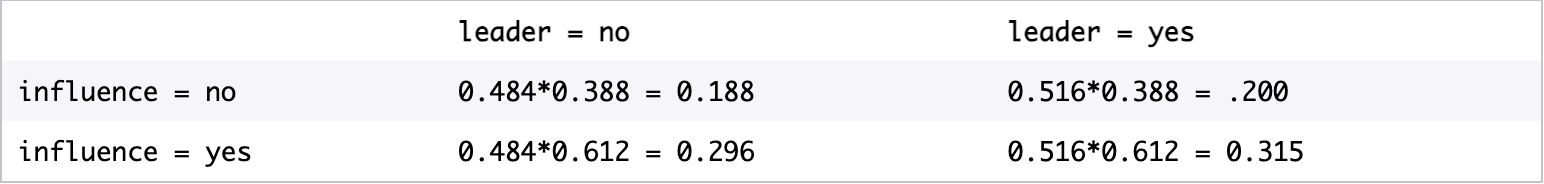

These proportions can then be converted to frequencies by multiplying each one by the sample size (11097 for this data):

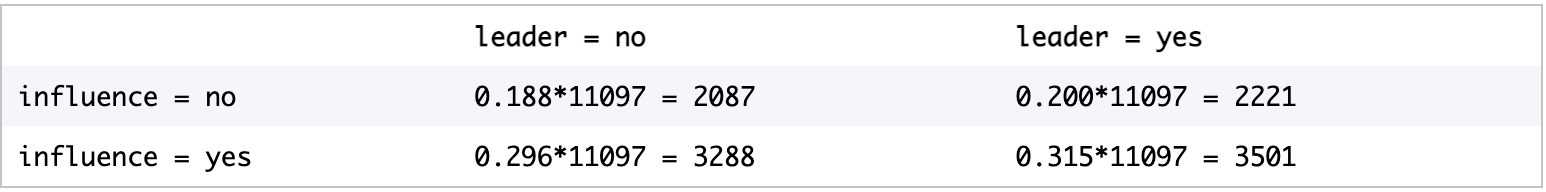

This table tells us that __if__ there were no association between the leader and influence questions, we would expect 2087 people to answer no to both.

In python, we can calculate this table using the __chi2_contingency()__ function from SciPy, by passing in the observed frequency table. There are actually four outputs from this function, but for now, we’ll only look at the fourth one:

In [16]:
chi2, pval, dof, expected = chi2_contingency(influence_leader_freq)
print(np.round(expected))

[[2087. 2221.]
 [3288. 3501.]]


In [17]:
influence_leader_freq = pd.crosstab(npi.influence, npi.leader)
print(influence_leader_freq)

leader       no   yes
influence            
no         3015  1293
yes        2360  4429


The more that the expected and observed tables differ, the more sure we can be that the variables are associated. In this example, we see some pretty big differences (eg., 3015 in the observed table compared to 2087 in the expected table). This provides additional evidence that these variables are associated.

***

## The Chi-Square Statistic

In the previous exercise, we calculated a contingency table of expected frequencies if there were no association between the leader and influence questions. We then compared this to the observed contingency table. Because the tables looked somewhat different, we concluded that responses to these questions are probably associated.

While we can inspect these tables visually, many data scientists use the Chi-Square statistic to summarize how different these two tables are. To calculate the Chi Square statistic, we simply find the squared difference between each value in the observed table and its’ corresponding value in the expected table; then add up those numbers:



In [18]:
chi2, pval, dof, expected = chi2_contingency(influence_leader_freq)
print(chi2)

1307.8836807573769


The interpretation of the Chi-Square statistic is dependent on the size of the contingency table. For a 2x2 table (like the one we’ve been investigating), a Chi-Square statistic larger than around 4 would strongly suggest an association between the variables. In this example, our Chi-Square statistic is much larger than that — 1307.88! This adds to our evidence that the variables are highly associated.